# 4-1 Matplotlibを使ったデータ可視化

＜章トビラ＞

データ分析をする上で、対象となるデータを可視化することはとても重要です。単に数字を眺めているだけでは、データに潜む傾向がなかなか見えなかったりしますが、データをビジュアル化することで、データ間の関係性なども見えてきます。特に、近年はインフォグラフィックスなどといって、可視化が注目されています。

ここでは、主に`Matplotlib`と`Seaborn`を使って、データを可視化する基本的な方法を身につけましょう。参考URL「B-8」が参考になります。

そして、この章の最後に今までの総合問題として、時系列データの分析とマーケティングの分析の問題を用意しています。これまで学んだ手法を試せる機会ですので、ぜひチャレンジしてみてください。

ゴール：Matplotlibを使って、さまざまなデータを可視化することができる。この章の総合問題が解ける。

- **[4-1.1 データの可視化](#4-1.1-データの可視化)**
    - [4-1.1.1 データの可視化について](#4-1.1.1-データの可視化について)
    - [4-1.1.2 この章で使うライブラリのインポート](#4-1.1.2-この章で使うライブラリのインポート)
<br><br>
- **[4-1.2 データ可視化の基礎](#4-1.2-データ可視化の基礎)**
    - [4-1.2.1 散布図](#4-1.2.1-散布図)
    - [4-1.2.2 グラフの分割](#4-1.2.2-グラフの分割)
    - [4-1.2.3 関数グラフの描画](#4-1.2.3-関数グラフの描画)
    - [4-1.2.4 ヒストグラム](#4-1.2.4-ヒストグラム)
    - [4-1.2.5 棒グラフ](#4-1.2.5-棒グラフ)
    - [4-1.2.6 円グラフ](#4-1.2.6-円グラフ)
<br><br>
- **[4-1.3 応用：金融データの可視化](#4-1.3-応用：金融データの可視化)**
    - [4-1.3.1 可視化する金融データ](#4-1.3.1-可視化する金融データ)
    - [4-1.3.2 ローソクチャートを表示するモジュール](#4-1.3.2-ローソクチャートを表示するモジュール)
<br><br>
- **[4-1.4 応用：分析結果の見せ方を考えよう](#4-1.4-応用：分析結果の見せ方を考えよう)**
    - [4-1.4.1 資料作成のポイントについて](#4-1.4.1-資料作成のポイントについて)
<br><br>
- **[4-1.5 総合問題](#4-1.5-総合問題)**
    - [4-1.5.1 ■総合問題4-1-1 時系列データ分析](#■総合問題4-1-1-時系列データ分析)
    - [4-1.5.2 ■総合問題4-1-2 マーケティング分析](#■総合問題4-1-2-マーケティング分析)

***

## 4-1.1 データの可視化


### 4-1.1.1 データの可視化について
データを可視化することで、さまざまな示唆を得ることができます。単に数字をみているだけでは得られない発見もありますし、図にすることで、データに対する理解がより深まります。また、データ分析の結果を相手に説明する場合も、可視化は重要です。さまざまな数値を比較してそれらの数値だけ見せるよりは、それらを棒グラフや円グラフにして見せるほうが、相手にとっても理解がしやすいはずです。ここでは、データの可視化をするための手法や見せ方のポイントを紹介します。


### 4-1.1.2 この章で使うライブラリのインポート

この章では、各種ライブラリを使います。次のようにインポートしていることを前提として、以下、進めていきます。

In [1]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import requests
import zipfile
import io
import os
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# 小数第３位まで表示
%precision 3

'%.3f'


Matplotlibでは、描画に関するほとんどの機能が「`pyplot.機能名`」で提供されています。「`import matplotlib.pyplot as plt`」とインポートし、「`mpl.pyplot.機能名`」とフルネームで書くのではなく「`plt.機能名`」と略記できるようにしています。

`Seaborn`は`Matplotlib`を、さらに便利に活用することを可能にするライブラリです。インポートするだけで追加機能を使うことができ、また、いくつかの追加のスタイルを指定できるようになります。

以下の「`%matplotlib inline`」は、Jupyter Notebook上にグラフを表示するためのマジックコマンドです。Jupyter環境の初学者の方はグラフを書くときに忘れやすいので、注意しましょう。

In [2]:
# セルの横幅を広げる
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 4-1.2 データ可視化の基礎
キーワード：散布図、グラフの分割、ヒストグラム、棒グラフ、円グラフ、バブルチャート、積み上げグラフ

### 4-1.2.1 散布図

Matplotlabでは、さまざまなグラフを描けますが、まずは、散布図から始めましょう。散布図は、2つの組み合わせデータに対して、`x−y`座標上に点をプロットしたグラフです。`plt.plot(x, y, 'o')`で描写でき、最後の引数はグラフの形状を指定するもので`'o'`は点で描くという意味です。その他の動作については、コード中のコメントを参考にしてください。

散布図を描くと、2変数の関係性などが見えてきます。

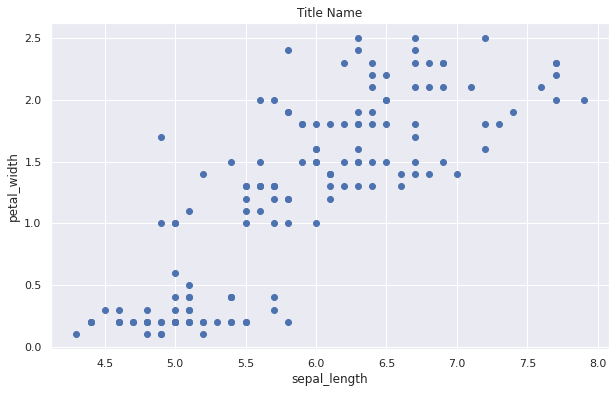

In [3]:
# 散布図
import seaborn as sns
df = sns.load_dataset('iris')

# x軸のデータ
x = df['sepal_length']

# y軸のデータ
y = df['petal_width']

# グラフの大きさ指定（10や6を変更してみてください）
plt.figure(figsize=(10, 6))

# グラフの描写
plt.plot(x, y, 'o')

#以下でも散布図が描ける
#plt.scatter(x, y)

# タイトル
plt.title('Title Name')
# Xの座標名
plt.xlabel('sepal_length')
# Yの座標名
plt.ylabel('petal_width')

# grid（グラフの中にある縦線と横線）の表示
plt.grid(True)

連続した値を与えれば、`plot`による描画は点ではなく曲線に見えます。たとえば次の例は、時系列など連続した（厳密には連続とみなした）曲線を描くものです。

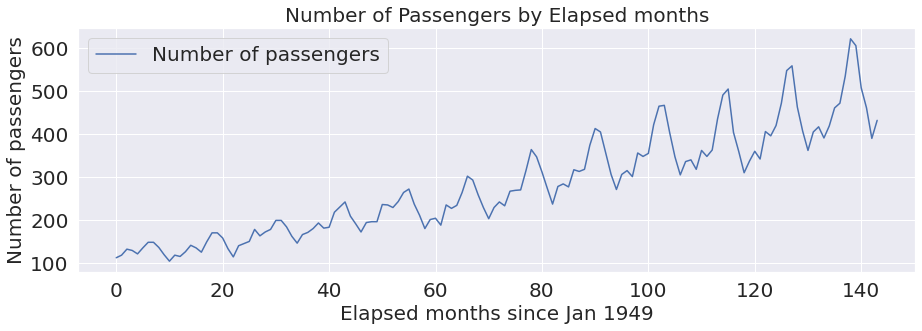

In [4]:
# 連続曲線

# フライトの乗降客数の時系列データ
df = sns.load_dataset('flights')

# x軸のデータを指定
x = np.arange(df.shape[0])

# y軸のデータを指定
y = df['passengers']

# グラフの大きさを指定
plt.figure(figsize=(15, 4.5))

# label=とlegendでラベルをつけることが可能
plt.plot(x, y, label='Number of passengers')
plt.legend(fontsize=20)

# ラベルを指定すると同時にフォントサイズも変更
plt.title('Number of Passengers by Elapsed months', fontsize=20)
plt.xlabel('Elapsed months since Jan 1949', fontsize=20)
plt.ylabel('Number of passengers', fontsize=20)

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid(True)

### 4-1.2.2 グラフの分割

`Subplot`を使うと、グラフを複数に分けることができます。以下は、2行1列のグラフを作成し、1番目と2番目と番号を指定して表示する例です。なお、`linspace(-10,10,100)`は$-10$から$10$までの数を$100$個に分割した数字リストを取り出すものです。

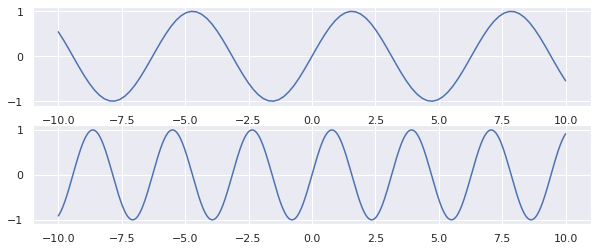

In [5]:
# グラフの大きさを指定
plt.figure(figsize=(10, 4))

# 2行1列のグラフの1つ目
plt.subplot(2,1,1)
x = np.linspace(-10, 10,100)
plt.plot(x, np.sin(x))

# 2行1列のグラフの2つ目
plt.subplot(2,1,2)
y = np.linspace(-10, 10, 1000)
plt.plot(y, np.sin(2*y)) 

plt.grid(True)

### 4-1.2.3 関数グラフの描画

ニュートン法で扱った

\begin{eqnarray}
f(x) = x^2 + 2x +1
\end{eqnarray}

の二次関数をグラフで表示する例です。このようにグラフにすると、$y=0$ と交わる近辺が$-2.5～0$の範囲であるので、この数値計算しなくても、解がおおよそ、この範囲にあることがわかります。

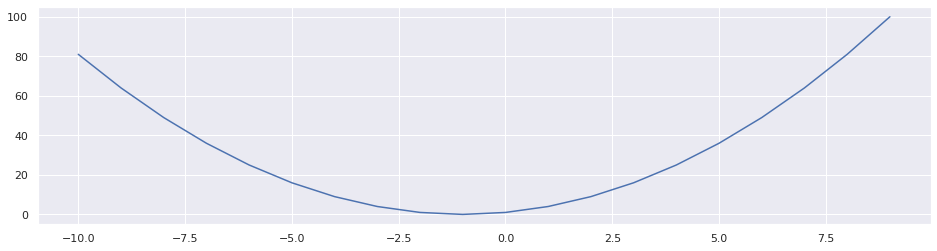

In [6]:
# 関数の定義（Scipyで使った二次関数の例と同じ）
def my_function(x):
    return x ** 2 + 2 * x + 1

x = np.arange(-10, 10)
plt.figure(figsize = (16, 4))
plt.plot(x, my_function(x))
plt.grid(True)

### 4-1.2.4 グラフの日本語化

matplotlibはデフォルトでは日本語を扱うことができません。  
次のように日本語によるラベル指定が含まれるコードを実行すると、多数の警告文が表示されるとともに、出力されたグラフをよく見るとラベルが文字化けを起こしてしまっています。  
`【以下のコードは警告文の表示を伴うコードです】`

Text(0, 0.5, '花弁の幅')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12367 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29255 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38263 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12373 missing from current font.
  font.set_

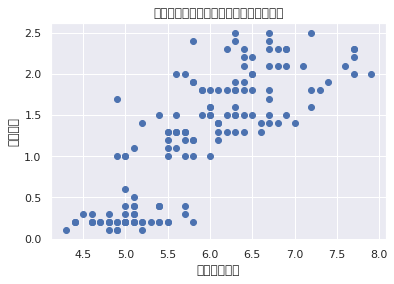

In [7]:
import seaborn as sns
df = sns.load_dataset('iris')

# x軸・y軸のデータをそれぞれ指定
x = df['sepal_length']
y = df['petal_width']

# グラフの描写
plt.scatter(x, y)

# 各ラベルを指定
plt.title('アヤメのがく片の長さと花弁の幅の関係')
plt.xlabel('がく片の長さ')
plt.ylabel('花弁の幅')

そこで、日本語のラベルを追加したい場合には専用の追加モジュールを導入します。

In [8]:
# matplotlib日本語化モジュールをまず実行環境にインストールする。
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 4.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120341 sha256=831fea755a1aae7249dfd7b5ab73e4a3b772e96294682456188b0182774bcd8a
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [9]:
# インストールが済んだら、モジュールをインポートする。
import japanize_matplotlib

上記のコマンドでインストールとインポートが完了すると、次のように日本語表示が可能になります。

Text(0, 0.5, '花弁の幅')

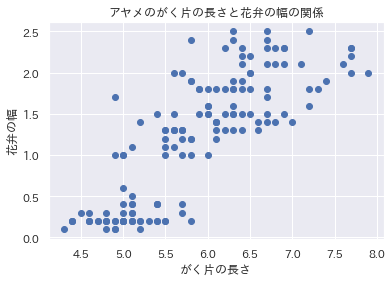

In [10]:
# 先ほどと同じコード
df = sns.load_dataset('iris')
x = df['sepal_length']
y = df['petal_width']

# グラフの描写
plt.scatter(x, y)

# 各ラベルを指定
plt.title('アヤメのがく片の長さと花弁の幅の関係')
plt.xlabel('がく片の長さ')
plt.ylabel('花弁の幅')

### Appendix: グラフの描画にSeabornを組み合わせる

`Seaborn`は`Matplotlib`をベースにした可視化ライブラリで、より魅力的な描画を可能にするだけでなく、利便性の面でも`Matplotlib`を補う機能を持つ多彩なAPIが用意されています。  
例えば上記のコードのうち、グラフ描画を行う関数である`scatter関数`を、`Seaborn`の散布図描画関数である`scatterplot関数`に置き換えてみます。  
`Seaborn`のグラフ描画関数には非常に便利な引数「`hue`」が用意されており、ここに色分けを行う基準としたいカテゴリカル変数のカラムを指定するだけで、次のようにカテゴリごとの分布比較を容易に行うことができます。  
グラフ描画関数以外の関数は、そのまま`Matplotlib`の関数を流用できる点も要注目です。知識的な面での互換性が高いため、併せて覚えておくと効率的にグラフの表現手段を増やすことができるでしょう。

Text(0, 0.5, '花弁の幅')

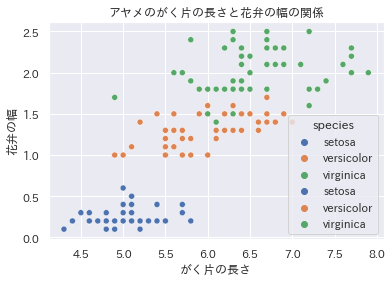

In [11]:
# 先ほどと同じコード
df = sns.load_dataset('iris')
x = df['sepal_length']
y = df['petal_width']

# グラフの描写（ここだけが先ほどのコードと異なり、Seabornの関数を使っています。）
sns.scatterplot(x=x, y=y, hue=df['species'])

# Matplotlibと同じ書き方ができることを強調するため上記の書き方を示しましたが、Seabornでは下記の方がより一般的な書き方です（どちらでも結果は同じ）。
sns.scatterplot(data=df, x='sepal_length', y='petal_width', hue='species')

# 先ほどと同じコード
plt.title('アヤメのがく片の長さと花弁の幅の関係')
plt.xlabel('がく片の長さ')
plt.ylabel('花弁の幅')

### 4-1.2.5 ヒストグラム

次のグラフは、ヒストグラムと言われ、それぞれの値の**度数**（値が出現する回数）を示します。データの全体像を観察するときに使われる図です。データ分析では、このグラフを見て、どんな数値が多いのか、少ないのか、偏りがあるのかないのかを読み解きます。

下記のように`hist`メソッドを使うと、ヒストグラムを描けます。括弧内に指定しているパラメータは、先頭から順に、「対象となるデータ」「ビンの数（幅、個数）」「範囲」です。

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 <a list of 10 Text major ticklabel objects>)

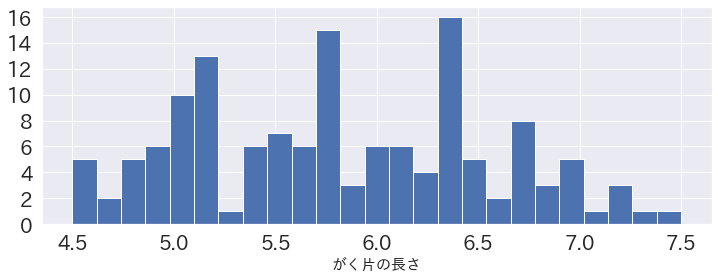

In [12]:
# グラフの大きさ指定
plt.figure(figsize = (12, 4))

# x軸のラベルを指定
plt.xlabel('がく片の長さ', fontsize=15)

# ヒストグラムの描写
plt.hist(x=df['sepal_length'], bins=25, range=(4.5, 7.5))

# Seabornで描写する場合
#sns.histplot(data=df, x='sepal_length', bins=25, binrange=(4.5, 7.5))

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

`hist`メソッドには他にも、さまざまなパラメータがあります。次のように「?」を使うと、利用できるパラメータを確認できます。

In [13]:
?plt.hist

また、`help`を使うと、どのような機能であるかを確認することもできます。`?`はJupyter環境（より正確にはIPython）独自の機能ですが、`help`はPythonの標準機能です。

In [14]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*,...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `n

#### <練習問題 4-1-1>

$y = 5x + 3$ （$x$は$-10$から$10$の値）のグラフを描いてみましょう。

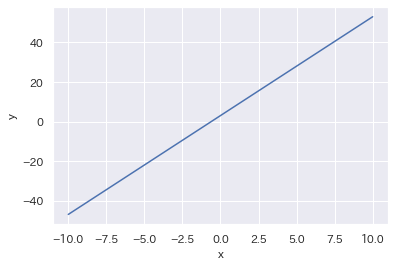

In [15]:
x=np.linspace(-10, 10, 100)
plt.plot(x, 5*x+3)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

#### <練習問題 4-1-2>

「$y = sin(x)$」と「$y = cos(x)$」のグラフを重ねて描いてください（$x$は-10から10の値）

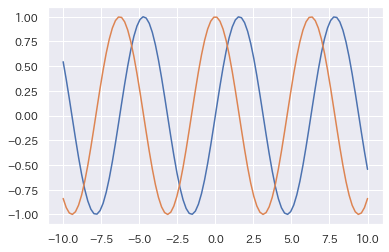

In [16]:
x=np.linspace(-10, 10, 100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.grid(True)

#### <練習問題 4-1-3>

0から1の値をとる一様乱数を1,000個、2組発生させて、それぞれのヒストグラムを描いてみましょう。

なお、それぞれのヒストグラムを別のグラフに表示するために、`plt.subplot`を利用してください。また、ここで一様乱数とは、ある数から別のある数まで等確率で発生する乱数のことをいい、`np.random.uniform`を使います。たとえば、0から1までの数を10個発生させる場合は、`np.random.uniform(0.0, 1.0, 10)`とします。

また、1,000個だけではなく、100個や10,000個などでも実施してみましょう。何かわかることはありますか。

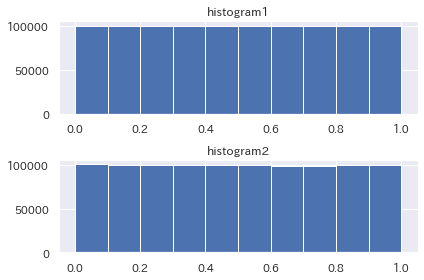

In [17]:
import math
def unko(N):
  x=np.random.uniform(0.0, 1.0, N)
  y=np.random.uniform(0.0, 1.0, N)

  plt.subplot(2, 1, 1)
  plt.hist(x)
  plt.title("histogram1")

  plt.subplot(2, 1, 2)
  plt.hist(y)
  plt.title("histogram2")

  plt.grid("True")
  plt.tight_layout()

unko(1000000)

### おまけ問題：モンテカルロ法

乱数を発生させる方法を使って、円周率を求めるプログラムを作成してみましょう。なお、このアプローチを**モンテカルロ法**といいます。

（1）区間`[0,1)`上の一様分布に従う乱数を2組発生させて、それぞれ10,000個の一様乱数を作ってみましょう。
なお、一様乱数とは、ある数から数まで等確率で発生する乱数のことです。`np.random.uniform`を使います。たとえば、`np.random.uniform(0.0, 1.0, 10)`とすると、0～1の範囲の一様乱数を10個発生できます。

（2）$x−y$軸を使った中心$(0,0)$、半径1の円と、長さ1の正方形を考えます。このとき円の面積は$\pi$となり、正方形の面積は1となります。ここで先ほどの$x$と$y$の組み合わせの乱数10000個のうち、円の内部に入る点は何組あるでしょうか。

ここで、円の内部に入るとは、$x−y$座標の原点から点$ (x, y) $のベクトルの長さを求め、それが1より小さくなる場合を判定基準とします。その長さを求めるために、ユークリッドノルム($\sqrt{x^2 + y^2}$)を使います。Pythonでは、 `math.hypot(x,y)`で計算できます。さらに余裕があれば、円の中に入った$x$と$y$の組み合わせと外に出た$x$と$y$の組み合わせをプロットして図にしてみましょう。


（3）半径1の1/4の円の面積と長さ1の正方形の面積との比は、$ \pi /4 : 1$となりますので、これと先ほどの結果を利用して、円周率を求めてみましょう。

In [18]:
#(1)
import math
N=10000
x=np.random.uniform(0.0, 1.0, N)
y=np.random.uniform(0.0, 1.0, N)

In [19]:
from numpy.ma import count
#(2)
unkox=[]
unkoy=[]
sikox=[]
sikoy=[]
tinpo=0
for count in range(0, N):
  d=math.hypot(x[count], y[count])
  if d<1:
    tinpo += 1
    unkox.append(x[count])
    unkoy.append(y[count])
  else:
    sikox.append(x[count])
    sikoy.append(y[count])
print("Number in circle: ", tinpo)

Number in circle:  7809


In [20]:
#(3)
print("pi: ", 4.0*1.0*tinpo/N)

pi:  3.1236


### 4-1.2.6 棒グラフ

次は、棒グラフです。これは、カテゴリーごと（地域別、部門別など）に数値を比較したいときに使います。棒グラフを表示するには、pyplotモジュールの`bar`関数を使います。棒にラベルを表示したいときは、`xtick`関数を使って以下のように指定します。

また、そのまま実行するとグラフが左に寄ってあまり見栄えが良くないので、グラフを中央に寄せるために、`align = 'center'`パラメータを指定するとよいでしょう。$x$のラベルや$y$のラベルの付け方は、2章で説明した通りです。

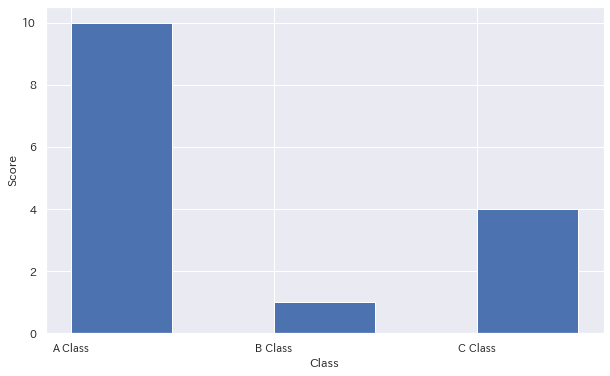

In [21]:
# 表示するデータ
x = [1, 2, 3]
y = [10, 1, 4]

# グラフの大きさ指定  
plt.figure(figsize = (10, 6))

plt.bar(x, y, align='edge', width = 0.5)

# 棒グラフそれぞれのラベル
plt.xticks(x, ['A Class', 'B Class', 'C Class'])

# xとyのラベルを設定
plt.xlabel('Class')
plt.ylabel('Score')

# グリッドを表示
plt.grid(True)

#### 横の棒グラフ
先ほどは縦の棒グラフでしたが、横にしたい場合は、`barh`関数を使います。なお、$x$の軸と$y$の軸が入れかわるので、ラベルを再設定しています。

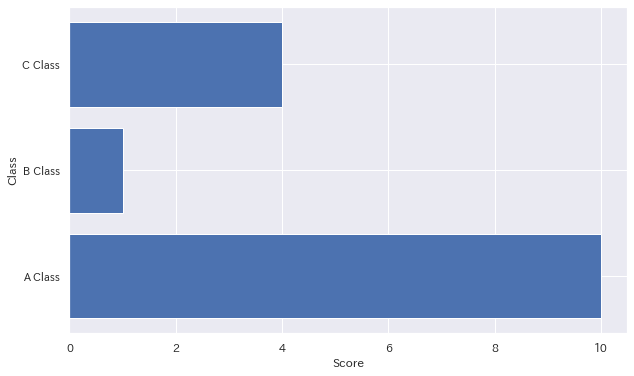

In [22]:
# 表示するデータ
x = [1, 2, 3]
y = [10, 1, 4]

# グラフの大きさ指定 
plt.figure(figsize = (10, 6))

plt.barh(x, y, align = 'center')
plt.yticks(x, ['A Class','B Class','C Class'])
plt.ylabel('Class')
plt.xlabel('Score')
plt.grid(True)

#### 複数のグラフを描く

次に複数の棒グラフを描き、それぞれ比較してみましょう。以下は、クラスごとに数学の一期目の成績と最終成績をそれぞれグラフ化し、比較できるようにしたものです。

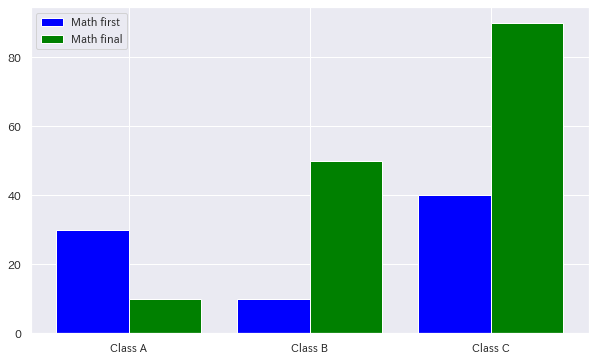

In [23]:
# データの準備
y1 = np.array([30, 10, 40])
y2 = np.array([10, 50, 90])

# X軸のデータ
x = np.arange(len(y1))

# グラフの幅
w = 0.4

# グラフの大きさ指定
plt.figure(figsize = (10, 6))

# グラフの描画。y2の方はグラフの幅の分、右にずらして描画する 
plt.bar(x, y1, color = 'blue', width = w, label = 'Math first', align = 'center')
plt.bar(x + w, y2, color='green', width = w, label = 'Math final', align = 'center')

# 凡例を最適な位置に配置
plt.legend(loc = 'best')

plt.xticks(x + w / 2, ['Class A', 'Class B', 'Class C'])
plt.grid(True)

#### 積み上げ棒グラフ

次に示すのは、積み上げの棒グラフの例です。同じく`bar`関数を使っていますが、`bottom`パラメータの設定に注目してください。上に積む方のグラフで、`bar`のパラメータとしてbottom=＜下に積むグラフ＞を指定します。

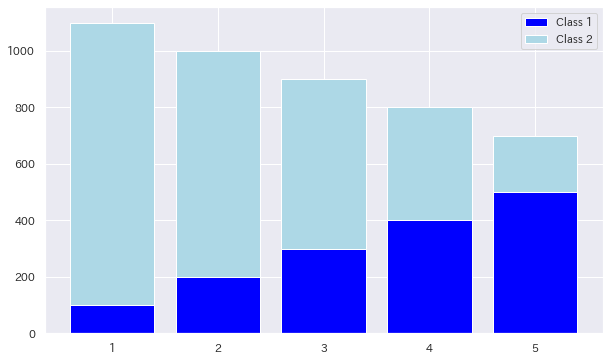

In [24]:
# データの準備
height1 = np.array([100, 200, 300, 400, 500])
height2 = np.array([1000, 800, 600, 400, 200])

# X軸
x = np.array([1, 2, 3, 4, 5]) 

# グラフの大きさ指定 
plt.figure(figsize = (10, 6))

# グラフの描画
p1 = plt.bar(x, height1, color = 'blue')
p2 = plt.bar(x, height2, bottom = height1, color='lightblue')

# 凡例を表示 
plt.legend((p1[0], p2[0]), ('Class 1', 'Class 2'))

なお、すでに説明していますが、関数のパラメータ等は、`help`関数を使うと調べられます。

In [25]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label st

### 4-1.2.7 円グラフ
次に、円グラフの描き方を説明します。これは、全体に対する割合が各々どれくらいあるのか見るときに使います。

#### 一般的な円グラフ
円グラフを描くには`pie`関数を使って、それぞれのサイズやラベル等を設定します。`axis`関数で円グラフを丸く表示するように調整します。`autopct`パラメータでそれぞれの割合を表示する書式を指定します。また`explode`パラメータを指定すると、特定のカテゴリーだけ、円グラフの全体から離す調整ができます（ここでは、`Hogs`だけ0.1に設定しています）。

`startangle`パラメータは、各要素の出力を開始する角度を表します。このパラメータを指定することで、出力開始位置を変更でき、「90」と指定すると上部中央が開始位置になります。反時計回りの方向に変更したい場合は正の値、時計回りに変更したい場合は負の値を指定します。

出力する向きは`counterclock`パラメータで指定します。`True`または指定しない場合は反時計回りに、`False`と指定すると時計回りに出力されます。


(-1.2142507666786346,
 1.134711077927507,
 -1.1258468317413044,
 1.101230806657754)

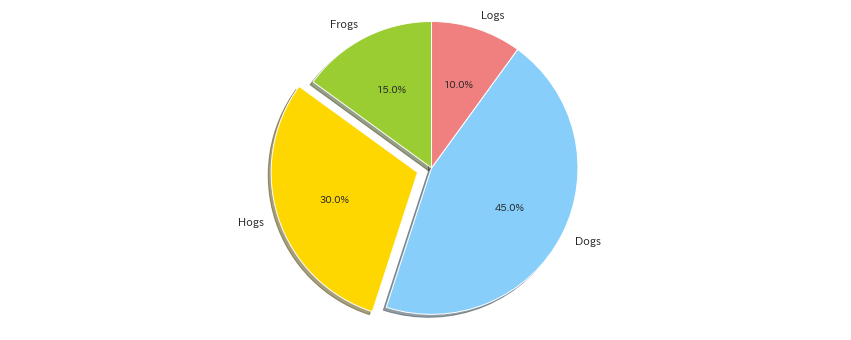

In [26]:
import matplotlib.pyplot as plt

labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0) 

# グラフの大きさ指定
plt.figure(figsize = (15, 6))

# グラフを表示
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)

# 円を丸く描画
plt.axis('equal')

`pie`関数のパラメータも、次のように`help`関数で確認できます。

In [27]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : array-like
        The wedge sizes.
    
    explode : array-like, optional, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list,

#### バブルチャート
次に`scatter`関数を使って、バブルチャートを作成してみます。

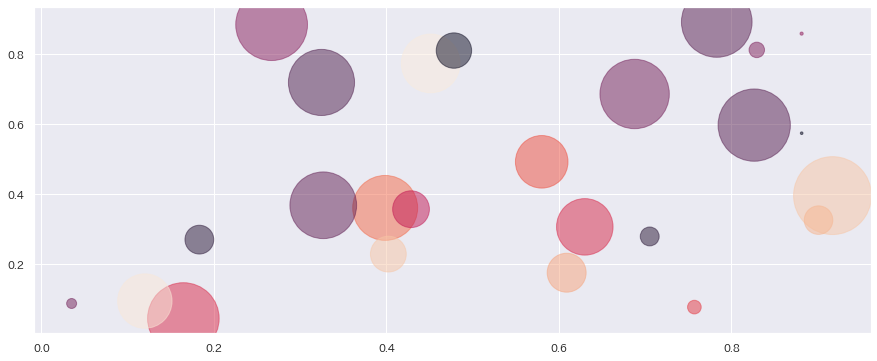

In [28]:
import numpy as np
import matplotlib.pyplot as plt

N = 25

# X,Yデータをランダムに生成 
x = np.random.rand(N)
y = np.random.rand(N)

# color番号
colors = np.random.rand(N)

# バブルの大きさをばらけさせる 
area = 10 * np.pi * (15 * np.random.rand(N)) ** 2

# グラフの大きさ指定
plt.figure(figsize = (15, 6))

# グラフを描画
plt.scatter(x, y, s = area, c = colors, alpha = 0.5)
plt.grid(True)

`scatter`関数のパラメータも`help`を使って確認しましょう。

In [29]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : scalar or array-like, shape (n, )
        The data positions.
    
    s : scalar or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single 

なお、Pandasにも可視化機能が備わっており、`plot`メソッドでグラフ化できます。たとえばデータの後に「`.plot(kind='bar')`」と記すと、縦の棒グラフが描けます。「`kind='barh'`」にすれば横の棒グラフ、「`kind='pie'`」にすれば円グラフとなります。必要なときに使ってください。
また本節の練習問題以外にも、以前扱ったデータを使って、色々とグラフ化できるので、実際にどのようなグラフができるか、作成してみましょう。

>**[やってみよう]**
>
>以下の練習問題以外にもデータを色々とグラフ化してみましょう。どのような目的を持って、どんなグラフを作成しますか?

これまでデータの可視化についてPythonの機能を紹介・実行してきましたが、データ分析やデータの可視化が注目されている現在、さまざまなデータ可視化ツール（Tableau 、Excel、PowerBIなど）があるため、ビジネスの現場ではそれらを使う場面が多くなっており、Pythonや他のプログラミング言語で可視化する機会は減っていきそうな雰囲気はあります。

しかし可視化レポートの自動化、アプリケーションとの連携、可視化の細かい設定などはプログラミングをした方が柔軟に対応できるケースもあります。そういった用途でデータの可視化を行うときはぜひ活用してください。

#### <練習問題 4-1-4>

数学の成績を示すデータである「student-mat.csv」を使って、学校を選んだ理由（`reason`）を円グラフ化して、それぞれの割合を出してください。
「student-mat.csv」は下記リンク内に存在します。

https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip

読み込むためには、以下のセルを実行してください。

In [44]:
# データがあるurlの指定
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

# データをurlから取得
r = requests.get(url, stream=True)

# zipfile内のstudent-mat.csvをカレントディレクトリ内のdataディレクトリに展開
with zipfile.ZipFile(io.BytesIO(r.content)) as existing_zip:
    existing_zip.extract('student-mat.csv', 'data')

In [45]:
# csvfileが存在するディレクトリ
data_dir = './data'

# data_dir内のファイルを確認
os.listdir(data_dir)

['student-mat.csv']

In [48]:
# student-mat.csvのpathを取得
#path = os.path.join(data_dir, 'student-mat.csv')

(-1.1193776980870564,
 1.1102745524399802,
 -1.1043131643562698,
 1.1002054024801953)

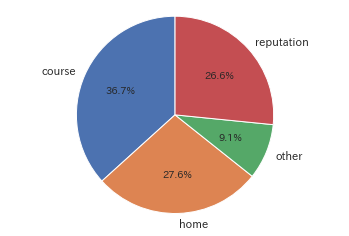

In [50]:
z=zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
student_data_math = pd.read_csv('student-mat.csv',sep=';')
student_data_math.groupby('reason').size().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.axis('equal')

#### <練習問題 4-1-5>

上記と同じデータで、`higher` (高い教育を受けたいかどうか。値は`yes`か`no`）を軸にして、それぞれの数学の最終成績G3の平均値を棒グラフで表示してください。ここから何か推測できることはありますか？

Text(0, 0.5, 'G3 grade ave')

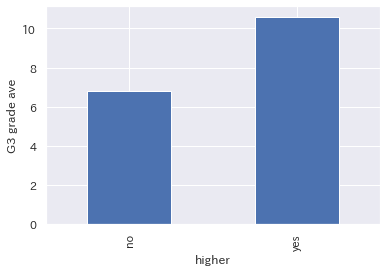

In [51]:
student_data_math.groupby('higher')['G3'].mean().plot(kind='bar')
plt.xlabel('higher')
plt.ylabel('G3 grade ave')

#### <練習問題 4-1-6>

上記と同じデータで、通学時間（`traveltime`）を軸にして、それぞれの数学の最終成績G3の平均値を横棒グラフで表示してください。何か推測できることはありますか？

Text(0.5, 0, 'G3 Grade ave')

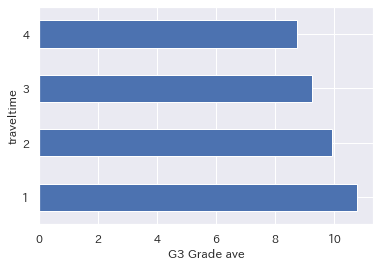

In [52]:
student_data_math.groupby(['traveltime'])['G3'].mean().plot(kind='barh')
plt.xlabel('G3 Grade ave')

### コラム さまざまなデータのビジュアル化

データのビジュアル化は、Python以外にも、さまざまなプログラミング言語、ライブラリで実現されており、Pythonでグラフ化するときの参考にもなります。
たとえばJavaScriptには、さまざまな図を描ける「D3.js」というライブラリがあり人気です。これはPythonとは関係なくJavaScriptで使うものですが、データを多方向から見せてビジュアル化するという意味では勉強になります。


![dd](http://visualisingadvocacy.org/sites/visualisingadvocacy.org/files/D3-index.jpg)

参照：https://d3js.org

## 4-1.3 応用：金融データの可視化
キーワード：ローソクチャート

ここでは、金融データの可視化について扱っていきます。ただし、応用範囲ですので、スキップしても問題ありません。練習問題もありません。

### 4-1.3.1 可視化する金融データ

この節では、次に示す金融データの可視化を考えます。

In [53]:
import pandas as pd
import numpy as np

In [54]:
# 日付データの設定。freq='T'で1分ごとにデータを生成する
idx = pd.date_range('2015/01/01', '2015/12/31 23:59', freq='T')

# 乱数の発生。１か−１を発生させる
dn = np.random.randint(2, size = len(idx)) * 2 - 1

# ランダムウォーク（ランダムに数値が増減するデータ）を作成
# np.cumprodは累積積を算出している（1番目の要素 * 2番目の要素 * 3番目の要素 * … と積が累積されていく）
rnd_walk = np.cumprod(np.exp(dn * 0.0002)) * 100

# resample('B')でデータを営業日単位でリサンプリング。
# ohlcメソッドで「open」「high」「low」「close」の4つのデータにする。
df = pd.Series(rnd_walk, index=idx).resample('B').ohlc()

そのままプロットすると、以下のようになります。なお、ここではPandasの可視化機能を使っています。数値はランダムに生成しているので、実際には紙面とは異なる形のグラフになります。

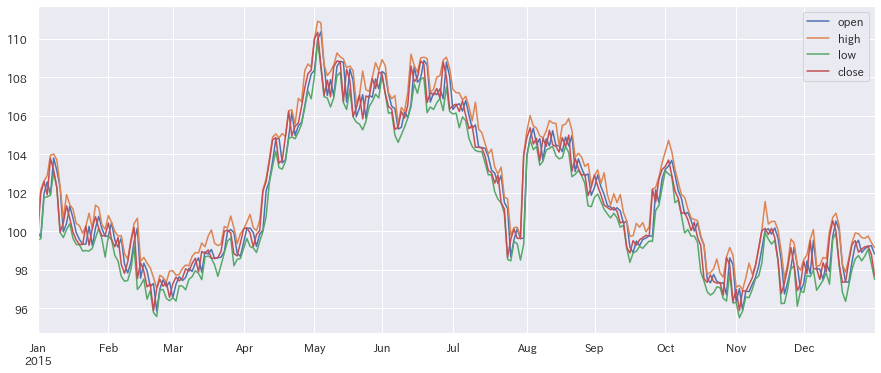

In [55]:
df.plot(figsize = (15,6), legend = 'best', grid = True)

### 4-1.3.2 ローソクチャートを表示するライブラリ

このグラフをローソクチャートとして表示してみましょう。
そのためには、Plotlyライブラリが必要です。Jupyter Notebookのセルに「!pip install plotly」と入力して［Run］を実行し、インストールしておいてださい。


ローソクチャートの表示に関しては、参考URL「B-23」も参考にしてください。


In [ ]:
!pip install plotly 

Plotlyライブラリのローソクチャート作成の機能を使えば、以下のように綺麗に表示することができます。インタラクティブにグラフをズームインすることもできますし、カーソルを載せると数字が表示され便利です。

In [56]:
# plotly モジュールのインポート
from plotly.offline import init_notebook_mode, iplot
from plotly import figure_factory as FF

# Jupyter notebook用設定
init_notebook_mode(connected=False) 

# Colaboratory用設定
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state()

# ローソクチャートの設定
fig = FF.create_candlestick(df.open, df.high, df.low, df.close, dates = df.index)
iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

参考文献「A-16」もご覧ください。PythonではなくJavaScriptのものもありますが、データを可視化するのに参考となります。『PythonユーザのためのJupyter［実践］入門』はJupyter Notebookの使い方について詳しく記載があり、データの可視化についてのコンテンツが充実しています。

## Appendix:  EDAを自動化する様々なライブラリ

EDAを行うためには分析を重ねながら多数の可視化作業を行うことが必要になりますが、そうした作業のうち、定型的な部分については自動化してしまうことによって作業効率を高めるライブラリも多数提案されています。  
以下にそのようなライブラリの一例をご紹介します。ここでは詳しくは扱いませんが、関心に応じて自ら公式ドキュメントを閲覧し、使い方を調べてみてください。  
また、ここでご紹介するのは比較的機能をシンプルなものに絞った簡易なものですが、より広範な機能を備えたライブラリも多数提案されています。  
重要なことは、個別のライブラリに習熟することではなく、こうした便利なツールは日々新たなものが提案されていますので、アンテナを高くし、より効率性と有効性の高い手法を常時キャッチアップしていくことです。

簡易な自動化EDAツールである「Pandas-Profiling」というライブラリを紹介します。  
このような比較的メジャーではないライブラリはGoogleColabのインストール済みリストの中に入っていませんので、まずはpip installを実行します。  
`【以下のコードは警告文の表示を伴うコードです】`

In [57]:
# Pandas-Profilingをインストール
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

# Pandas-Profilingの依存関係パッケージのダウングレード
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 22.0 MB 173 kB/s
     |████████████████████████████████| 102 kB 4.3 MB/s 
     |████████████████████████████████| 690 kB 26.2 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 9.9 MB 4.4 MB/s 
     |████████████████████████████████| 4.7 MB 39.3 MB/s 
     |████████████████████████████████| 296 kB 59.9 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.4.0-py2.py3-none-any.whl size=315268 sha256=b5c32b728bc60762cb67daa9678b562af8d9d993799e209195a3bea16ad5bb7a
  Stored in directory: /tmp/pip-ephem-wheel-cache-_n9p1x5i/wheels/c3/aa/10/94ee985ca5a122f047c430cf991df62fe210c4789d3b5762a5
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=2924eddd5a92adf5aa0b400cfd9cbc47ac5f39914cdc13ceaabf5138a44577ff
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


上記コードを実行するといくつかの警告メッセージが表示されますが、その中に「ランタイムを再起動してください」という旨のメッセージが表示される場合があります。  
この場合には、GoogleColabのメニューバーから「ランタイム」→「ランタイムを再起動」を選択します。  
ランタイムが再起動したら、引き続き以下のコードを実行していきます。

In [58]:
# ここではカリフォルニアの不動産データセットを事例とします。
import pandas as pd
from sklearn.datasets import fetch_california_housing
CH = fetch_california_housing()
df = pd.DataFrame(CH.data, columns= CH.feature_names)
df['MedHouseVal'] = CH.target
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [59]:
# 先ほどインストールしたPandas-Profilingをインポート
from pandas_profiling import ProfileReport
# Pandas-ProfilingにパッケージされているProfileReport関数の引数に、EDAを行いたいDataFrame形式のデータを渡す。
profile_df = ProfileReport(df, explorative=True)
# これを実行するとカレントディレクトリに可視化レポートのファイルが自動保存される。
profile_df.to_file("profile_df.html")
# 可視化レポートを確認する。
profile_df

Output hidden; open in https://colab.research.google.com to view.

問題なく実行が完了すると、html形式の可視化レポートが出力されます。  
インタラクティブに操作が可能ですので、マウスで操作しながら様々な特徴量同士の関係を分析してみてください。  
このレポートによる可視化だけでEDAが完了することはまずありませんが、ある程度定型的な部分を一括で済ませることで、よりクイックに深掘りしていく作業に入っていくことが可能になります。

## 4-1.4 応用：分析結果の見せ方を考えよう
ゴール：基本的な資料作成の方法を知る、データ分析結果を伝えるためのポイントを知る

これまでは、データ分析に必要なプログラミング技法を中心に、データ処理やそのテクニックについて学んできました。データの可視化についても、データを棒グラフにしたり、折れ線グラフにする方法、ラベルのつけ方など、テクニカルな解説が中心でした。自分自身の理解のために、探索的にデータをチェックするだけであれば、特に体裁は気にせず、デフォルトでグラフ表示される結果を見るだけでよいかもしれません。しかし、データ分析の結果を第三者に伝えるためには、その見せ方を工夫する必要があります。説明的分析ともいいますが、そのデータ分析結果を他人に伝える方法や、その資料作成の方法について、基本的なポイントを以下に記載します。

### 4-1.4.1 資料作成のポイントについて
キーワード：特になし

データの分析結果の報告は、今の会社にいる上層部への報告、クライアントへの提案など、さまざまな場面があります。資料作成の方法は、以下で紹介する参考文献などたくさんありますが、次に示す点は共通して大切です。

- 何のためにデータ分析をして、何を見せたいのかはっきりさせる

- そもそもその分析結果を誰に伝えるのか？　を考える

- いきなり資料の作成を開始しない、PowerPointを開かない、その前に考える

- その結果を見せることで、どんな具体的なアクションを促したいか？

- それをやることでどれだけ儲かるか？　コストが下がるのか？

- 何を話すのか、目次（アジェンダ）をはっきりさせる（全体像を見せる） 

- 基本的に結論が先

- 情報を入れすぎない、無駄なものは削除

- 言いたいことを一言で＋下にその根拠となるデータ（表）の可視化

- ストーリーを考える

その他、第三者に説明するときに3Dのグラフはあまり使わないほうが良いなどのポイントなどもありますが、それも場面によるので、やはりその結果を誰に見せるのか考えることが大事です。

また、先ほども書いたように、データを可視化するのは、Excelや他のツール（Tableauなど）でも良いです。この書籍ではPythonを採用しているのでMatplotlibを使ってグラフ等を表示していますが、ビジネスの現場で無理してMatplotlibを使う必要はありません。データがそれほど大きくない場合、素早くデータを可視化するのにExcelは非常に優れています。ケースバイケースで判断して、ツールを選んでください。

短いですが、以上が資料作成の基本となる作法になります。本書では、これ以上詳しくは扱いません。
以下は参考となる本で、資料を作成する際に読んでみてください。なお、本書は資料作成を主テーマとした本ではないので、テクニカルな技術を身につけるという視点でこのまま解説をしていきます。

参考文献「A-17」も参考にしてください。

以上でデータ可視化の章は終了です。お疲れ様でした。

次の問題は、金融の時系列データとマーケティングの購買データに関する総合問題です。今まで学んだテクニックが活かせる問題です。一部、これまで扱わなかった処理方法もあるので、ヒントなど参考にして、調べながら取り組んでください。
初学者にはなかなかハードな問題かもしれませんが、これらの問題に取り組むことで、今まで学んだ技法が役に立つことを実感できるでしょう。

***

## 4-1.5 総合問題

### ■総合問題4-1-1 時系列データ分析

ここでは、本章で身に付けたPandasやScipyなどを使って、時系列データついて扱っていきましょう。

（1）（データの取得と確認）下記のサイトより、dow_jones_index.zipをダウンロードし、含まれている`dow_jones_index.data`を使って、データを読み込み、はじめの5行を表示してください。またデータのそれぞれのカラム情報等を見て、`NaN`などがあるか確認してください。　　

https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip　　

（2）（データの加工）カラムの`open`、`high`、`low`、`close`等のデータは数字の前に$マークが付いているため、これを取り除いてください。また、日時を`date`型で読み込んでいない場合は、date型に変換しましょう。

（3）カラムの`close`について、各`stock`ごとの要約統計量を算出してください。

（4）カラムの`close`について、各`stock`の相関を算出する相関行列を出してください。また、`Seaborn`の`heatmap`関数を使って、相関行列のヒートマップを描いてみましょう（ヒント：`Pandas`の`corr`メソッドを使います）。

（5）(4)で算出した相関行列の中で一番相関係数が高い`stock`の組み合わせを抽出してください。さらに、その中でもっとも相関係数が高いペアを抜き出し、それぞれの時系列グラフを描いてください。

（6） Pandasの`rolling`メソッド（窓関数）を使って、上記で使った各`stock`ごとに、`close`の過去5期（5週間）移動平均時系列データを計算してください。

（7） Pandasの`shift`メソッドを使って、上記で使った各stockごとに、`close`の前期（1週前）との比の対数時系列データを計算してください。さらに、この中で、一番ボラティリティ（標準偏差）が一番大きい`stock`と小さい`stock`を抜き出し、その対数変化率グラフを書いてください。

>**[ポイント]**
>
>(6)、(7)についての補足です。
>
>時系列データ$(\cdots ,y_{t-1},y_t,y_{t+1}, \cdots )$の過去n期の移動平均データとは、過去n期のデータの平均、つまり以下を意味します。

\begin{eqnarray}
ma_t = \sum_{s=t-n+1}^t \frac{y_s}{n}
\end{eqnarray}

>時系列データ$(\cdots ,y_{t-1},y_t,y_{t+1}, \cdots )$の前期（1週前）との比の対数時系列データとは、$\log \frac{y_t} {y_{t-1}}$から成るデータのことです。増減率$r_t = \frac{y_t - y_{t-1}}{y_t}$が小さいとき、$r_t \approx \log \frac{y_t} {y_{t-1}}$の関係が成り立ちます。これは、$x$が十分小さいときに成り立つ、$\log (1+x) \approx x$から導かれます。増減率データ$(r_1,\cdots ,r_N )$のボラティリティとは、標準偏差

\begin{eqnarray}
\sqrt{\frac{1}{N}\sum_{t=1}^N \left(r_t - \frac{1}{N}\sum_{t=1}^N r_t\right)^2}
\end{eqnarray}

>のことで、価格変動の大きさを示す指標として利用されます。

### ■総合問題4-1-2 マーケティング分析

次は、マーケティング分析でよく扱われる購買データです。一般ユーザーとは異なる法人の購買データですが、分析する軸は基本的に同じです。

（1）下記のURLよりデータをpandasで読み込んでください（件数50万以上のデータで比較的大きいため、少し時間がかかります）。

http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

>**[ヒント]**
>
>`pd.ExcelFile`を使って、シートを`.parse('Online Retail')`で指定してください。

また、今回の分析対象は、`CustomerID`にデータが入っているレコードのみ対象にするため、そのための処理をしてください。さらに、カラムの`InvoiceNo`には数字の前に`C`があるものはキャンセルのため、このデータを取り除いてください。他にもデータとして取り除く必要があれば、適宜処理してください。以下、このデータをベースに分析していきます。

（2）このデータのカラムには、購買日時や商品名、数量、回数、購買者の`ID`などがあります。ここで、購買者（`CustomerID`）のユニーク数、バスケット数（`InvoiceNo`のユニーク数）、商品の種類（`StockCode`ベースと`Description`ベースのユニーク数）を求めてください。

（3）このデータのカラムには、`Country`があります。このカラムを軸に、それぞれの国の購買合計金額（単位あたりの金額×数量の合計）を求め、降順にならべて、上位5つの国の結果を表示してください。

（4）（3）の上位5つの国について、それぞれの国の商品売り上げ（合計金額）の月別の時系列推移をグラフにしてください。ここで、グラフは分けて表示してください。

（5）（3）の上位5つの国について、それぞれの国における売り上げトップ5の商品を抽出してください。また、それらを国ごとに円グラフにしてください。なお、商品は「`Description`」ベースで集計してください。

**謝辞**：以下3つのデータセットの利用に関して
1. https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
2. https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip
3. https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

引用元：Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [[http://archive.ics.uci.edu/ml](http://archive.ics.uci.edu/ml)]. Irvine, CA: University of California, School of Information and Computer Science.

- 1のデータセットの引用について追記：  
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp.5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
[http://www3.dsi.uminho.pt/pcortez/student.pdf](http://www3.dsi.uminho.pt/pcortez/student.pdf)  
- 2のデータセットの引用について追記：  
We request that you provide a citation to this paper when using the dataset. We welcome you to
compare your results against ours in (Brown, Pelosi & Dirska, 2013).  
- 3のデータセットの引用について追記：  
Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197â€“208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

参考文献一覧：

A-16:
『PythonとJavaScriptではじめるデータビジュアライゼーション』（オライリージャパン刊、ISBN:978-4873118086）

A-17:

『PythonユーザのためのJupyter[実践]入門』（技術評論社 刊、ISBN:978-4774192239）								
『入門 考える技術・書く技術―日本人のロジカルシンキング実践法』（ダイヤモンド社刊、ISBN:978-4478014585）											

B-8:
Matplotlib	http://matplotlib.org/ http://seaborn.pydata.org/

B-23:
"
Blaze	http://blaze.pydata.org/


